In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
# plt.style.use('dark_background')

In [2]:
df = pd.read_json( 'problems MoonBoard 2016 .json' )
l = []
for i, row in df.iterrows():
    l.append( row['data'] )
df = pd.DataFrame( l )

In [3]:
# Cleaning:
df = df[df['repeats'] >= 5 ]

In [4]:
grades = {
    '': -1,
    '6B': 0,
    '6B+': 1,
    '6C': 2,
    '6C+': 3,
    '7A': 4,
    '7A+': 5,
    '7B': 6,
    '7B+': 7,
    '7C': 8,
    '7C+': 9,
    '8A': 10,
    '8A+': 11,
    '8B': 12,
    '8B+': 13
}

In [5]:
df.fillna( '', inplace = True )

In [6]:
df['grade_index'] = df.apply(
    lambda x: grades[x['grade']], axis = 1
)

In [7]:
df['userGrade_index'] = df.apply(
    lambda x: grades[x['userGrade']], axis = 1
)

Text(936.0317460317461, 0.5, 'Voted Grade')

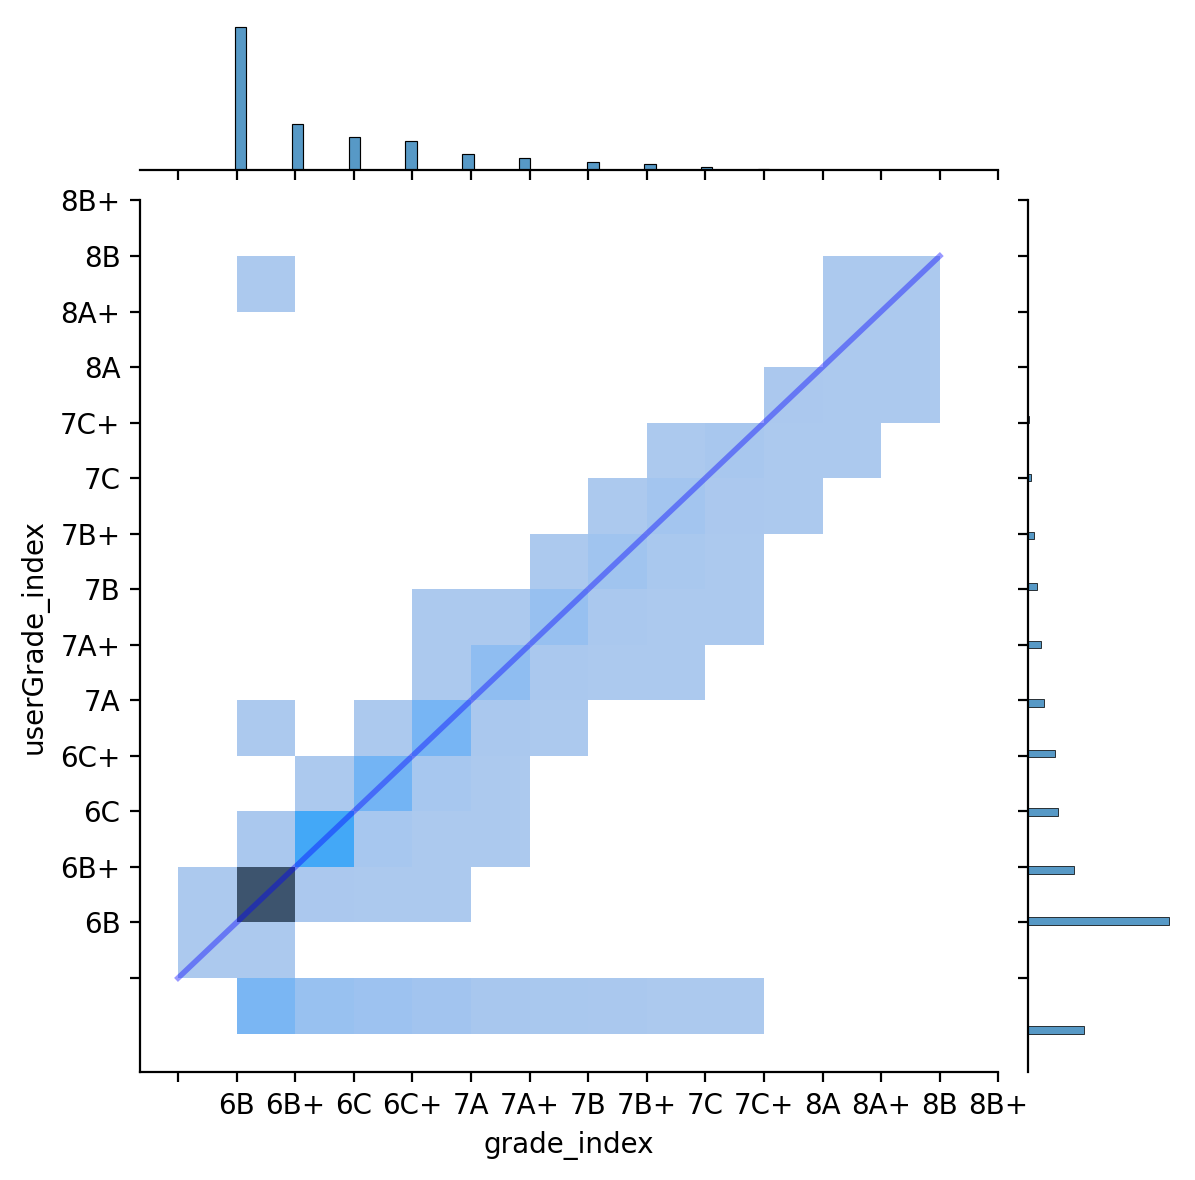

In [8]:
plot = sns.jointplot(
    data = df,
    x = 'grade_index',
    y = 'userGrade_index',
    kind = 'hist',
    binwidth = 1,
    # cmap = 'viridis'
)
plot.ax_joint.plot([0,13], [0, 13], 'b-', linewidth = 2, alpha = 0.4 )
plot.ax_joint.set_xticks( range( len( grades ) ), grades )
plot.ax_joint.set_yticks( range( len( grades ) ), grades )

plt.xlabel( 'Setter Grade' )
plt.ylabel( 'Voted Grade' )

In [9]:
grade, is_benchmark, moves = [], [], []
for i, row in df.iterrows():
    # row = row['data']
    grade.append(row['grade'])
    is_benchmark.append(row['isBenchmark'])
    moves.append( [ move['description'] for move in row['moves'] ] )

In [10]:
processed_df = pd.DataFrame(
    {'grade': grade,
     'is_benchmark': is_benchmark,
     'moves': moves
    })

In [11]:
display( processed_df )

,grade,is_benchmark,moves
0,6B+,True,"[E6, C5, E8, F11, C13, D15, D18]"
1,6B+,True,"[F5, J8, I11, K11, G13, E15, E18]"
2,6B+,False,"[F5, J5, F9, C10, G13, E15, I18]"
3,7A,True,"[B10, E6, E8, E12, E16, G4, I18, J5]"
4,7A,False,"[C5, D7, A9, F11, F13, I14, E16, D18]"
...,...,...,...
28563,6C+,False,"[F5, J2, C6, H10, K8, G13, I14, K12, E15, G18,..."
28564,6B+,False,"[G6, I6, H8, G4, E10, G13, E15, E18]"
28565,6B+,False,"[F5, E10, H8, G13, H16, E16, D18]"
28566,6B+,False,"[F5, G2, G9, C10, E12, A14, E16, B18]"


In [12]:
def moves_to_features( moves ):
    features = np.zeros( ( 18, 11 ) )
        
    for move in moves:
        features[int( move[1:] ) - 1, ord( str( move[0] ).upper() ) - 65 ] = 1
    # return np.flip( np.flip( features, axis = 0 ), axis = 1 )
    return np.flip( features, axis = 0 )

In [13]:
processed_df['features'] = processed_df.apply( 
    lambda x: moves_to_features( x['moves'] ), axis = 1
)

In [14]:
processed_df['features_flat'] = processed_df.apply( 
    lambda x: moves_to_features( x['moves'] ).flatten(), axis = 1
)

In [15]:
processed_df['grade_index'] = processed_df.apply(
    lambda x: grades[x['grade']], axis = 1
)

In [16]:
processed_df['n_holds'] = processed_df.apply(
    lambda x: len( x['moves'] ), axis = 1
)

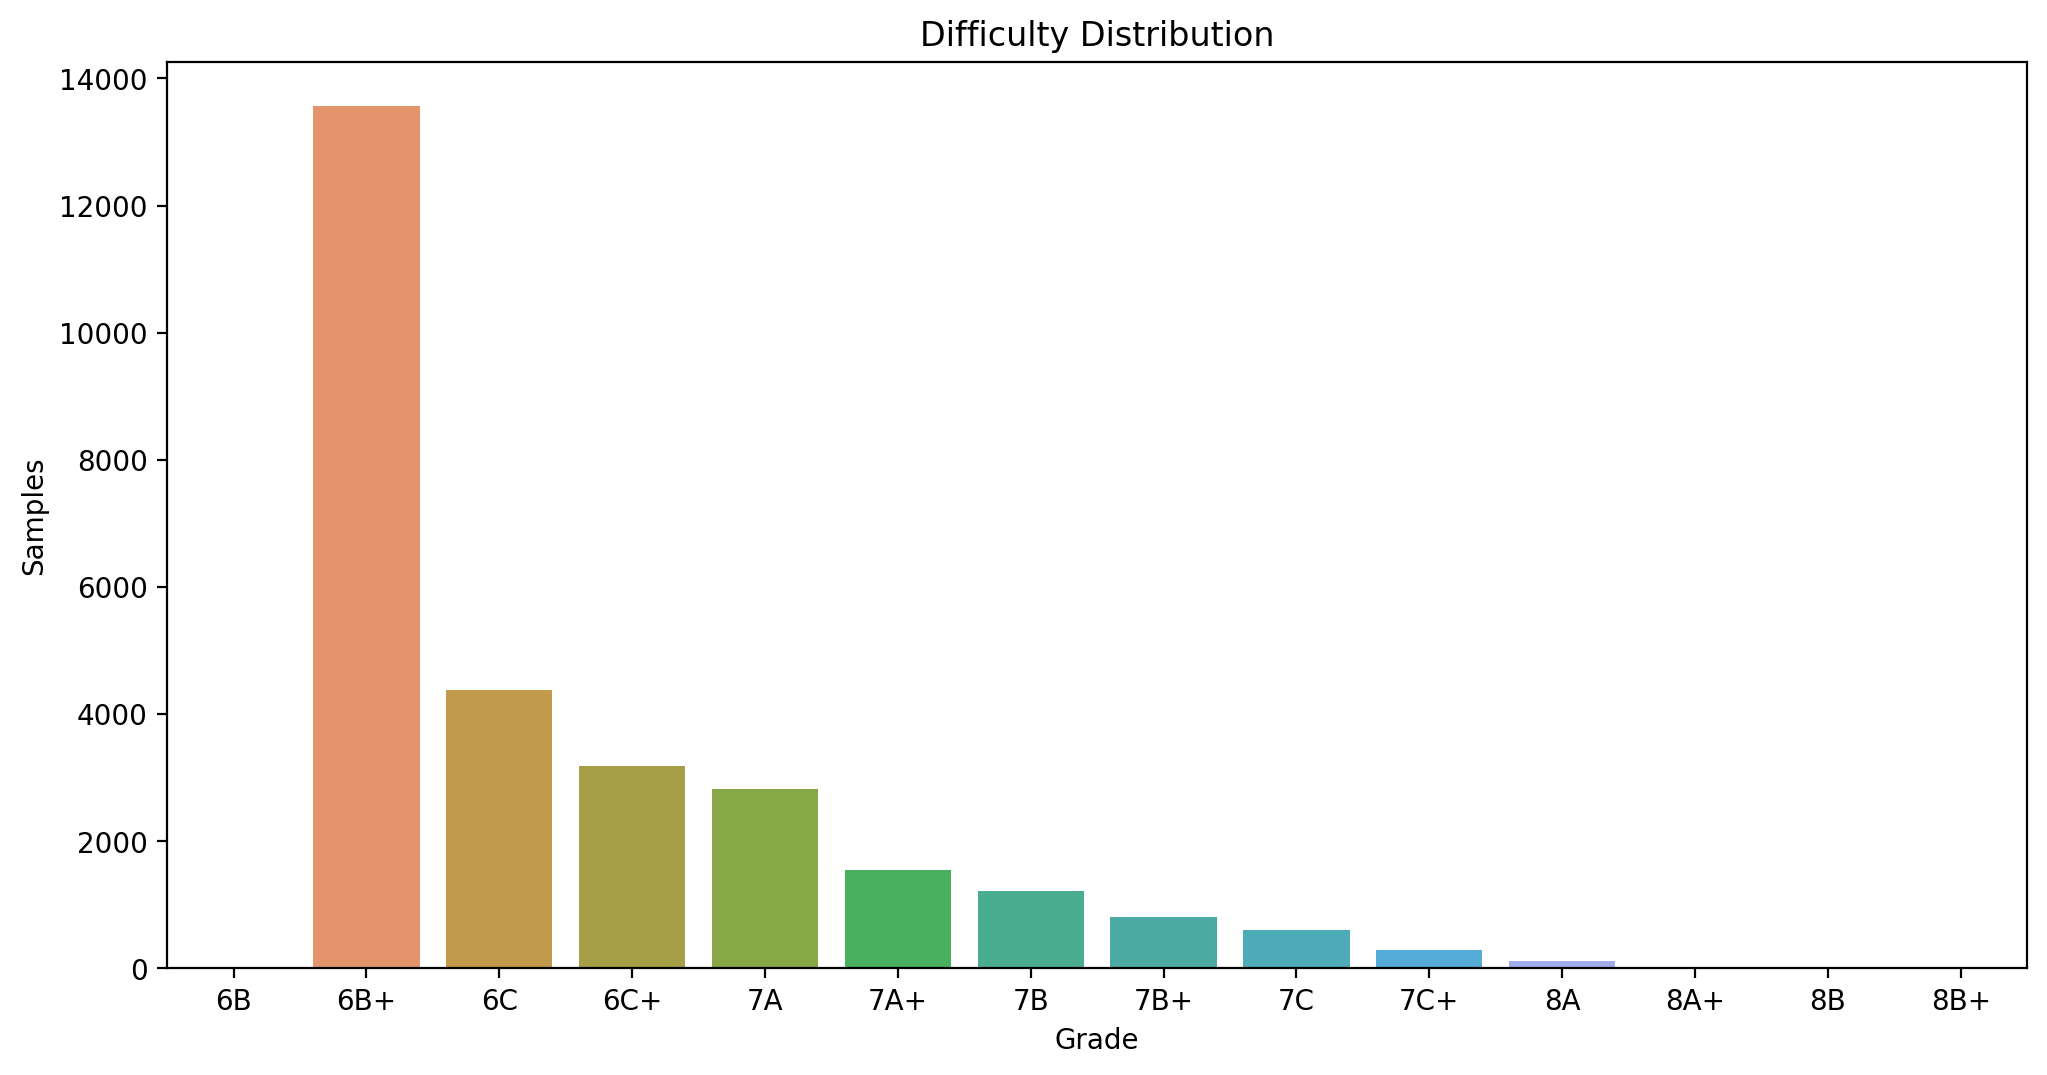

In [17]:
p = sns.countplot(
    data = processed_df,
    x = 'grade',
    order = np.sort( processed_df['grade'].unique() ),
)
p.set( title = 'Difficulty Distribution' )
p.set( ylabel = 'Samples' )
p.set( xlabel = 'Grade' )
plt.show()

In [18]:
display( processed_df )

,grade,is_benchmark,moves,features,features_flat,grade_index,n_holds
0,6B+,True,"[E6, C5, E8, F11, C13, D15, D18]","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,7
1,6B+,True,"[F5, J8, I11, K11, G13, E15, E18]","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1,7
2,6B+,False,"[F5, J5, F9, C10, G13, E15, I18]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",1,7
3,7A,True,"[B10, E6, E8, E12, E16, G4, I18, J5]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",4,8
4,7A,False,"[C5, D7, A9, F11, F13, I14, E16, D18]","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,8
...,...,...,...,...,...,...,...
28563,6C+,False,"[F5, J2, C6, H10, K8, G13, I14, K12, E15, G18,...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...",3,11
28564,6B+,False,"[G6, I6, H8, G4, E10, G13, E15, E18]","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1,8
28565,6B+,False,"[F5, E10, H8, G13, H16, E16, D18]","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,7
28566,6B+,False,"[F5, G2, G9, C10, E12, A14, E16, B18]","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,8


In [19]:
import joblib

In [21]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [22]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

def evaluate( train_predictions, predictions, y_train, y_test, plot_predictions = False ):
    metrics = {
        'train_mae': mae( y_train, train_predictions ),
        'train_rmse': mse( y_train, train_predictions ) ** ( 1 / 2 ),
        'test_mae': mae( y_test, predictions ),
        'test_rmse': mse( y_test, predictions ) ** ( 1 / 2 ),
    }
    
    if plot_predictions == True:
            plot = sns.jointplot(
                predictions,
                y_test,
                kind = 'hist',
            )
            plot.ax_joint.set_xticks( range( len( grades ) ), grades )
            plot.ax_joint.set_yticks( range( len( grades ) ), grades )
            plot.ax_joint.plot([0,13], [0, 13], 'b-', linewidth = 2, alpha = 0.4 )
            plot.ax_joint.set_xlabel( 'Predicted Grade' )
            plot.ax_joint.set_ylabel( 'True Grade' )

            plt.show()
    
    return metrics

In [25]:
X_train = np.array( processed_df[processed_df['is_benchmark'] == False]['features'].tolist() ).reshape( -1, 18 * 11 )
X_test = np.array( processed_df[processed_df['is_benchmark'] == True]['features'].tolist() ).reshape( -1, 18 * 11 )

y_train = np.array( processed_df[processed_df['is_benchmark'] == False]['grade_index'].tolist() )
y_test = np.array( processed_df[processed_df['is_benchmark'] == True]['grade_index'].tolist() )

In [26]:
X = np.array( processed_df['features'].tolist() ).reshape( -1, 18 * 11 )
y = np.array( processed_df['grade_index'].tolist() )

In [27]:
transform = PCA( n_components = 0.99999 )

In [28]:
import time
import datetime

LR
Time to Fit: 0.3079259395599365


/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


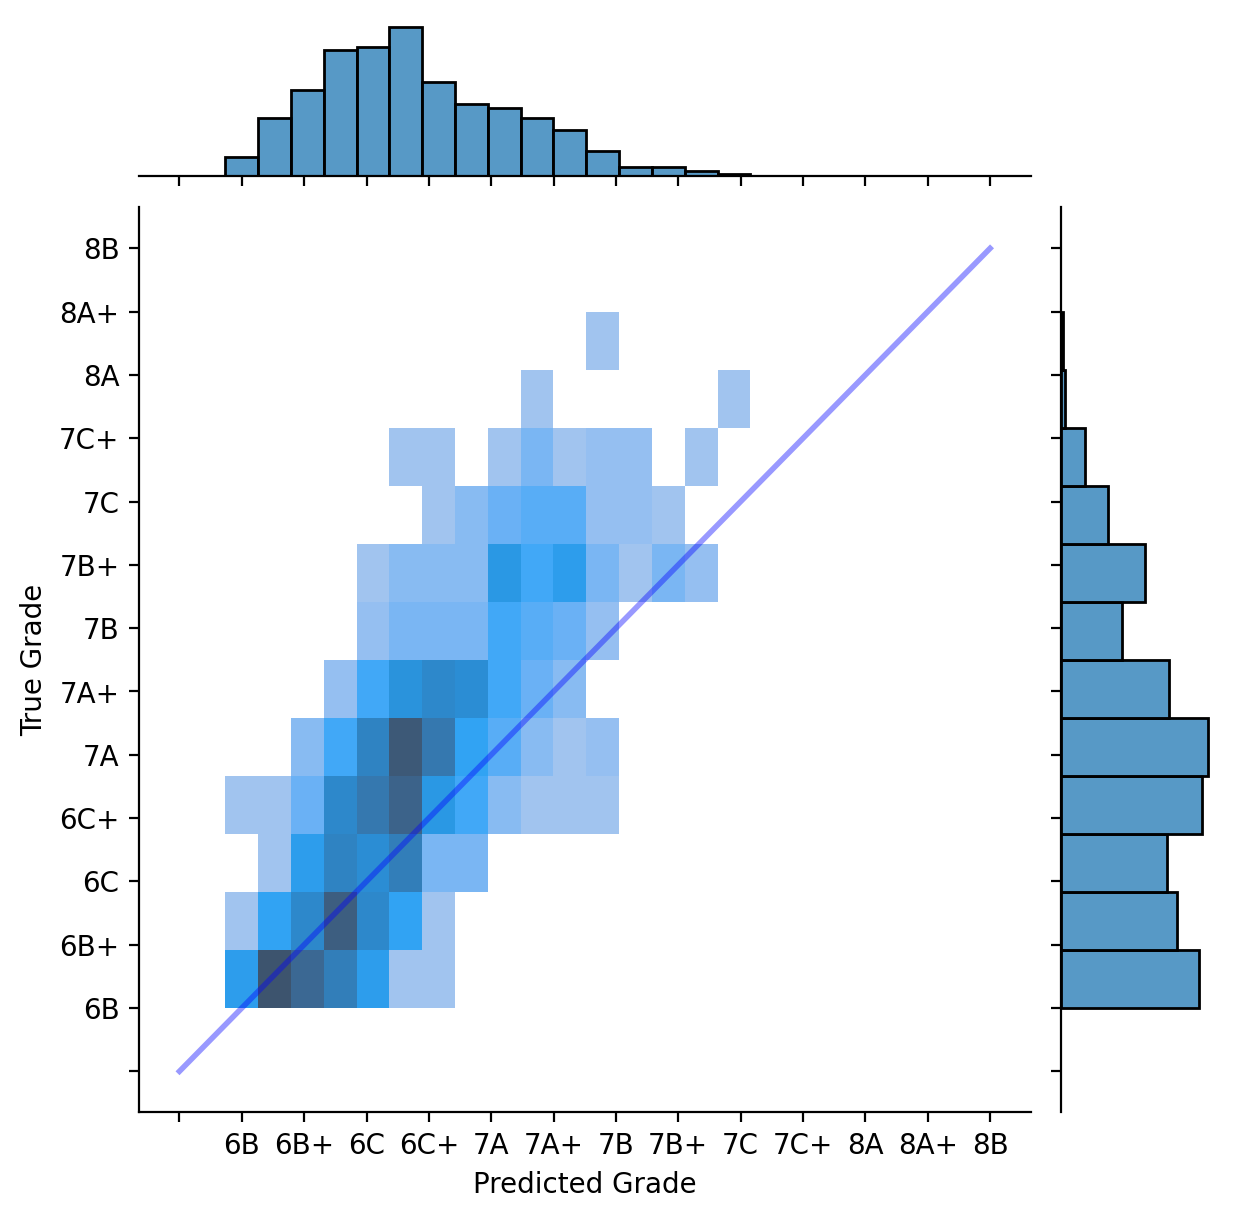

{'train_mae': 1.041947237938025, 'train_rmse': 1.3886099414011428, 'test_mae': 1.3803195630380172, 'test_rmse': 1.7683451623583755}

LR w/ L2
Time to Fit: 0.05170845985412598


/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


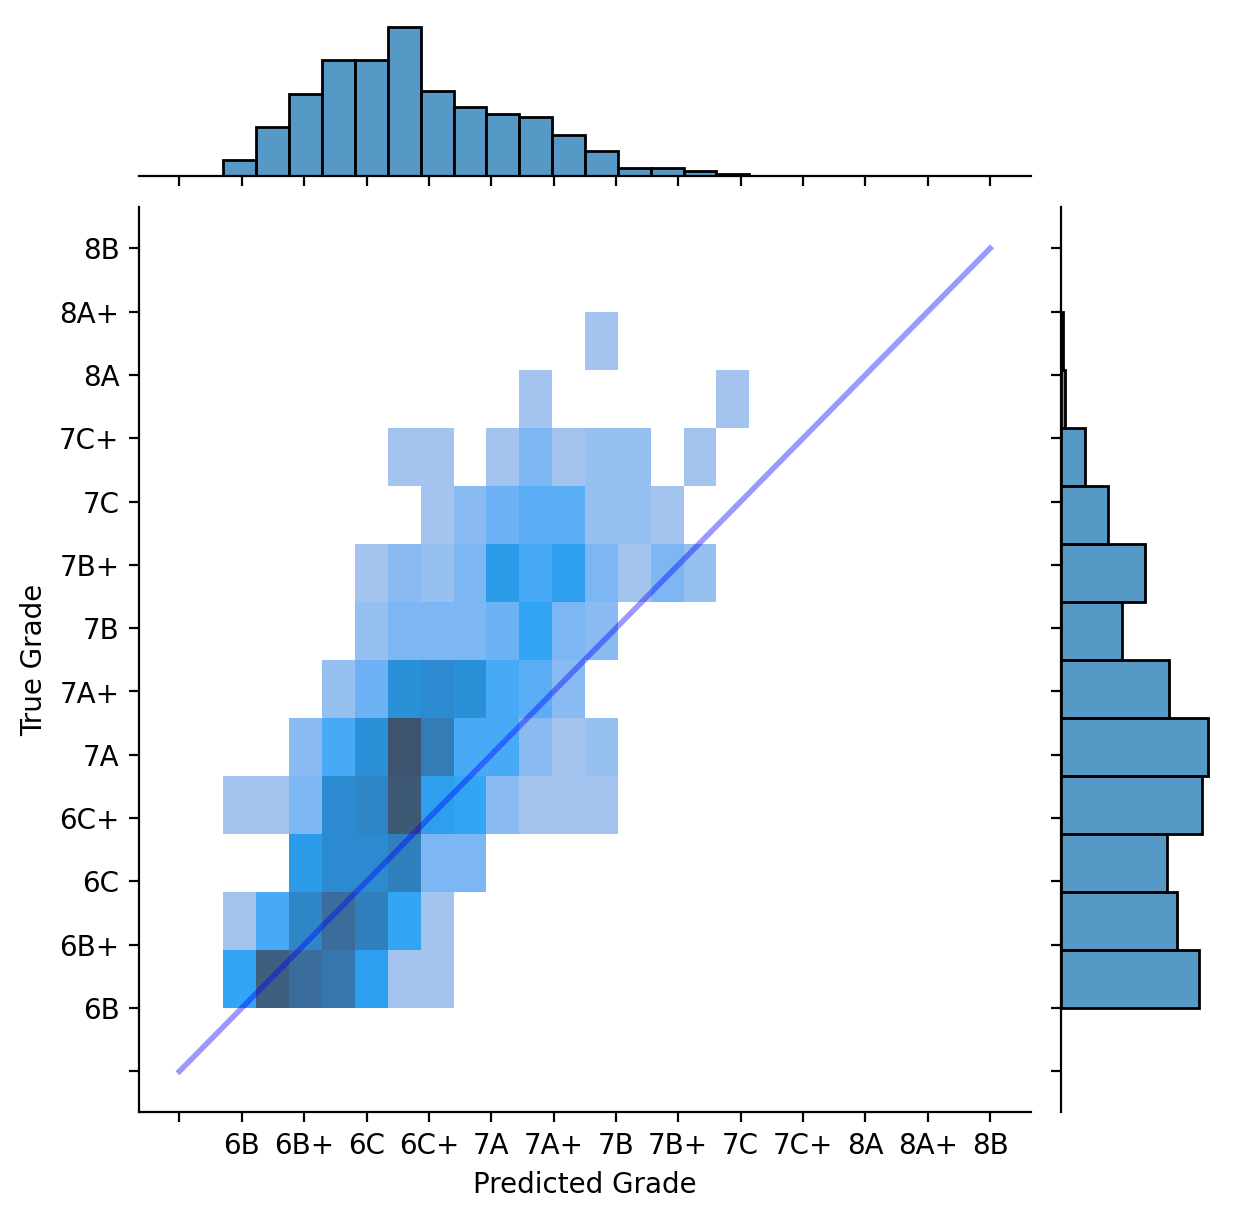

{'train_mae': 1.0421000307611408, 'train_rmse': 1.3886744815222083, 'test_mae': 1.3814711682407106, 'test_rmse': 1.7697560372282044}

SVR
Time to Fit: 196.86844992637634


/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


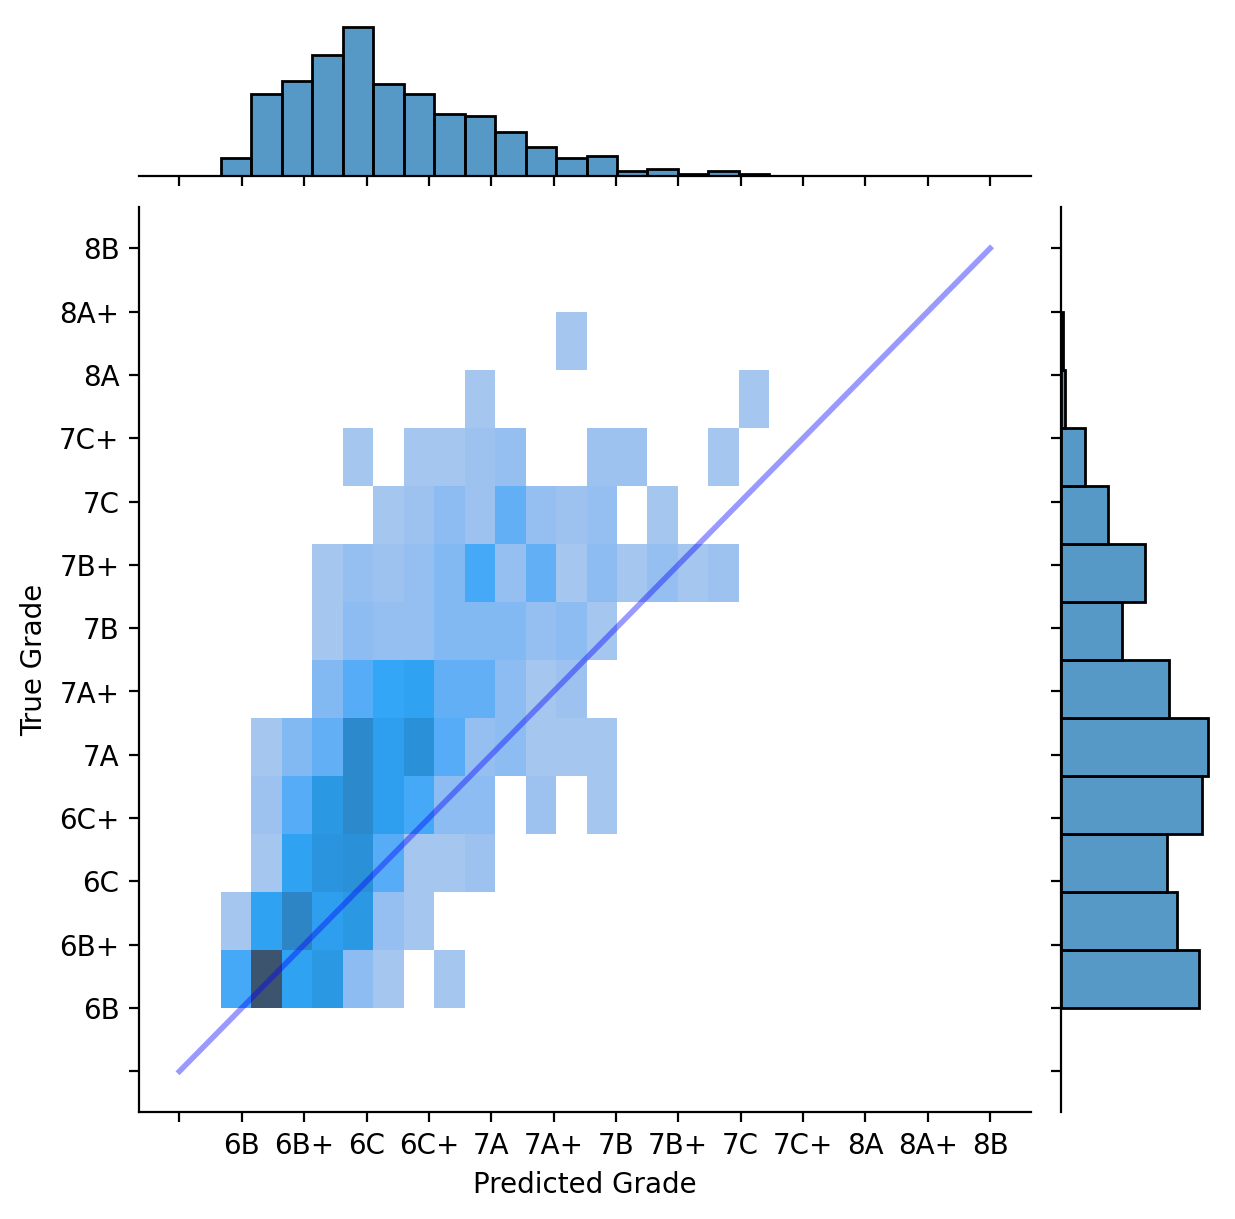

{'train_mae': 1.0111566859292518, 'train_rmse': 1.439066531660079, 'test_mae': 1.5765242995914215, 'test_rmse': 2.0491423087965157}

SVR5
Time to Fit: 446.2538435459137


/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


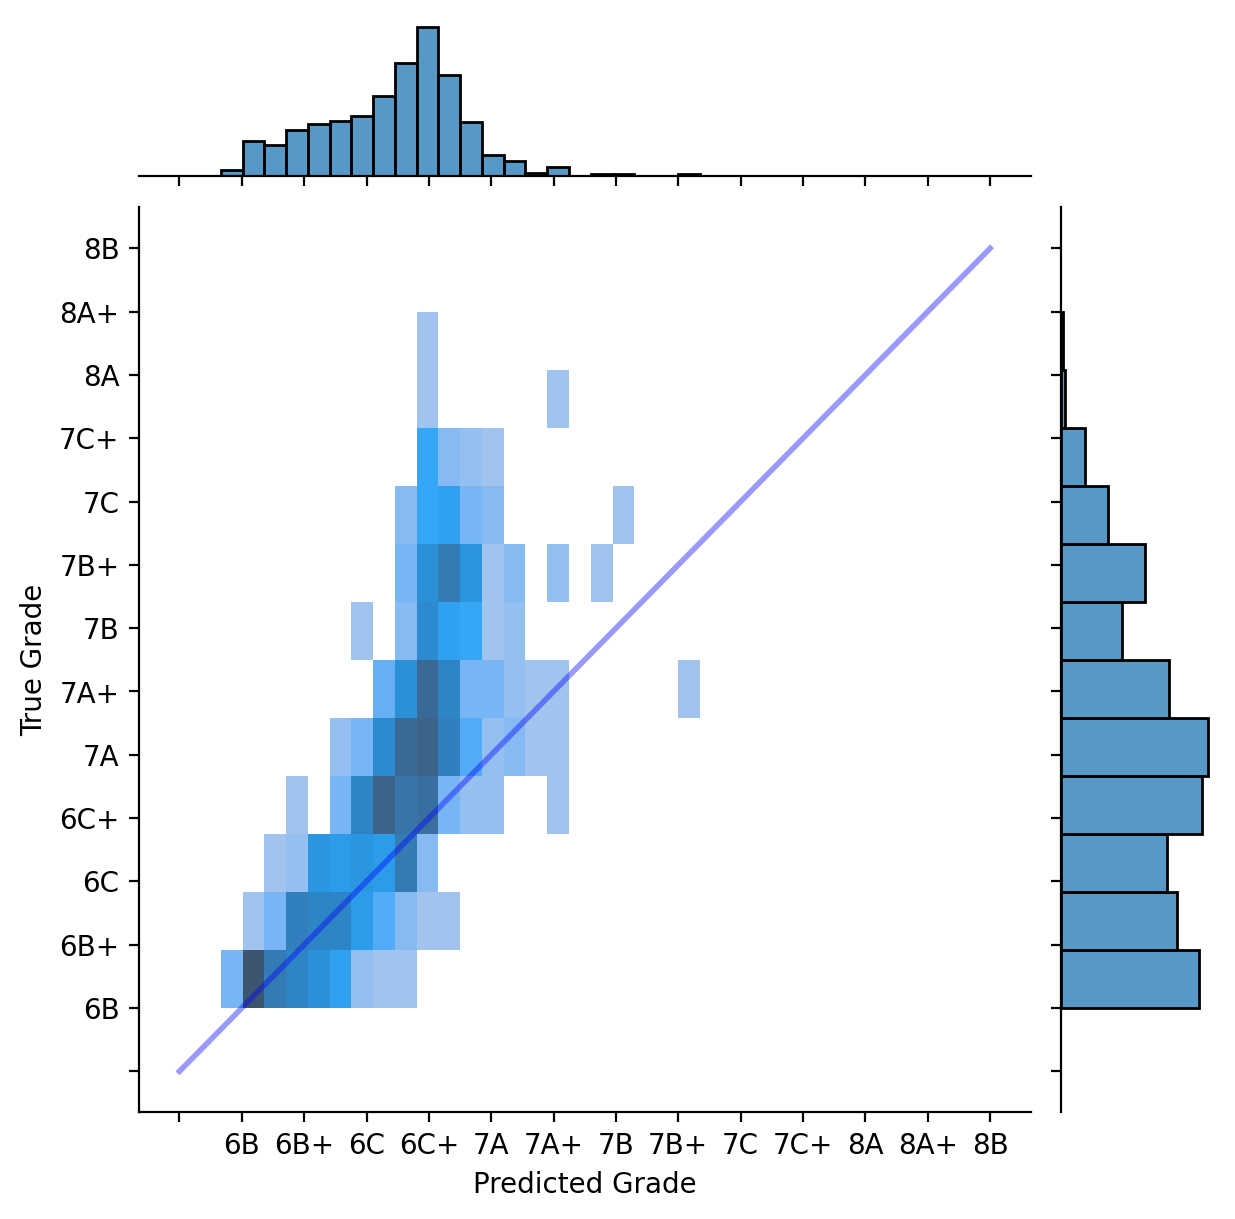

{'train_mae': 0.5023359969245911, 'train_rmse': 0.9939105257558352, 'test_mae': 1.5739130593721327, 'test_rmse': 2.158213002521657}

SVR10
Time to Fit: 466.2781527042389


/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


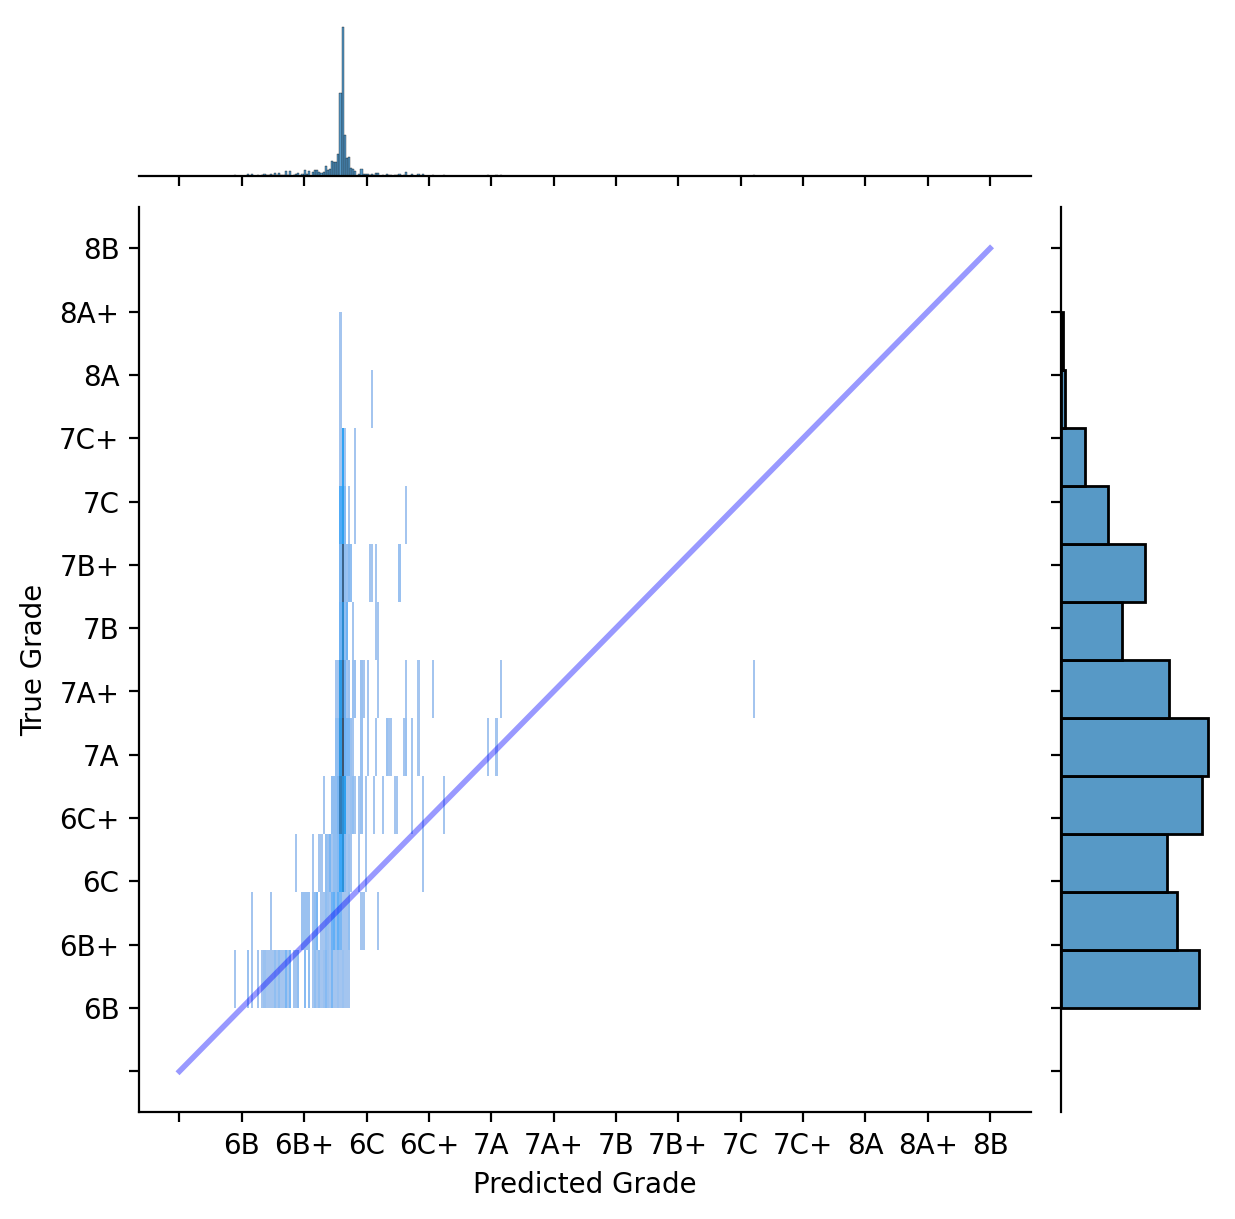

{'train_mae': 0.7233497385063276, 'train_rmse': 1.409066763456562, 'test_mae': 2.3680556730092146, 'test_rmse': 3.1022014798186697}

RBF SVR
Time to Fit: 340.50380778312683


/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


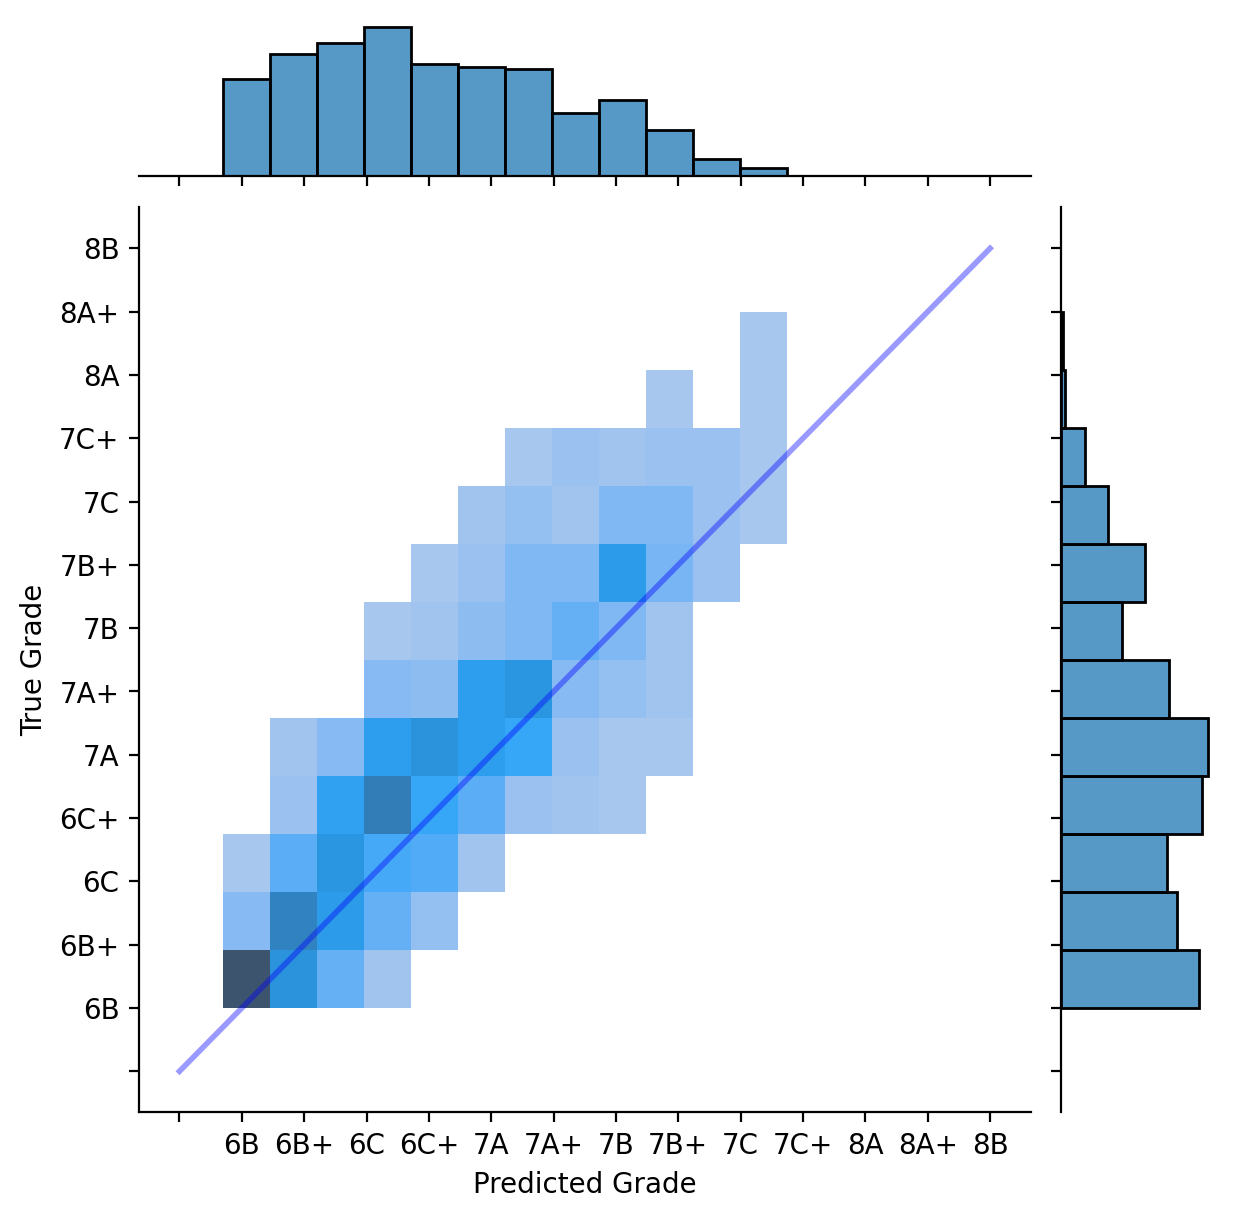

{'train_mae': 0.5579785467944202, 'train_rmse': 0.9315596670006819, 'test_mae': 0.9853637902567001, 'test_rmse': 1.2871656851405475}

DTR
Time to Fit: 0.40735483169555664


/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


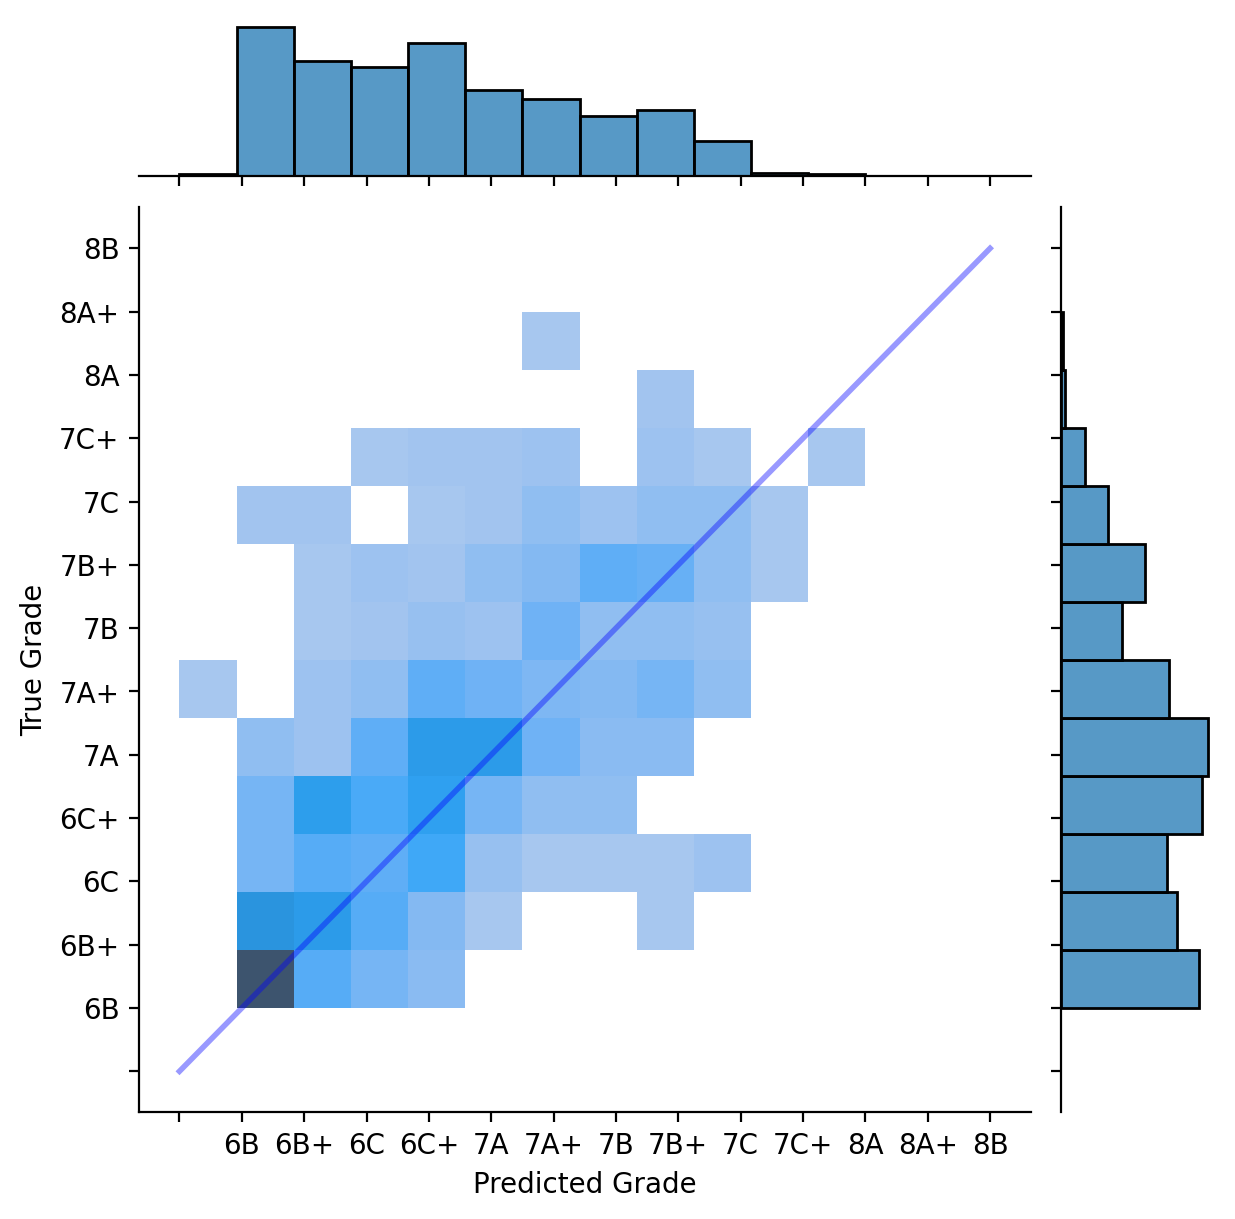

{'train_mae': 0.0006066445419833708, 'train_rmse': 0.023518441325832008, 'test_mae': 1.444954128440367, 'test_rmse': 2.0269966937146875}

XGBR
Time to Fit: 2.188934803009033


/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


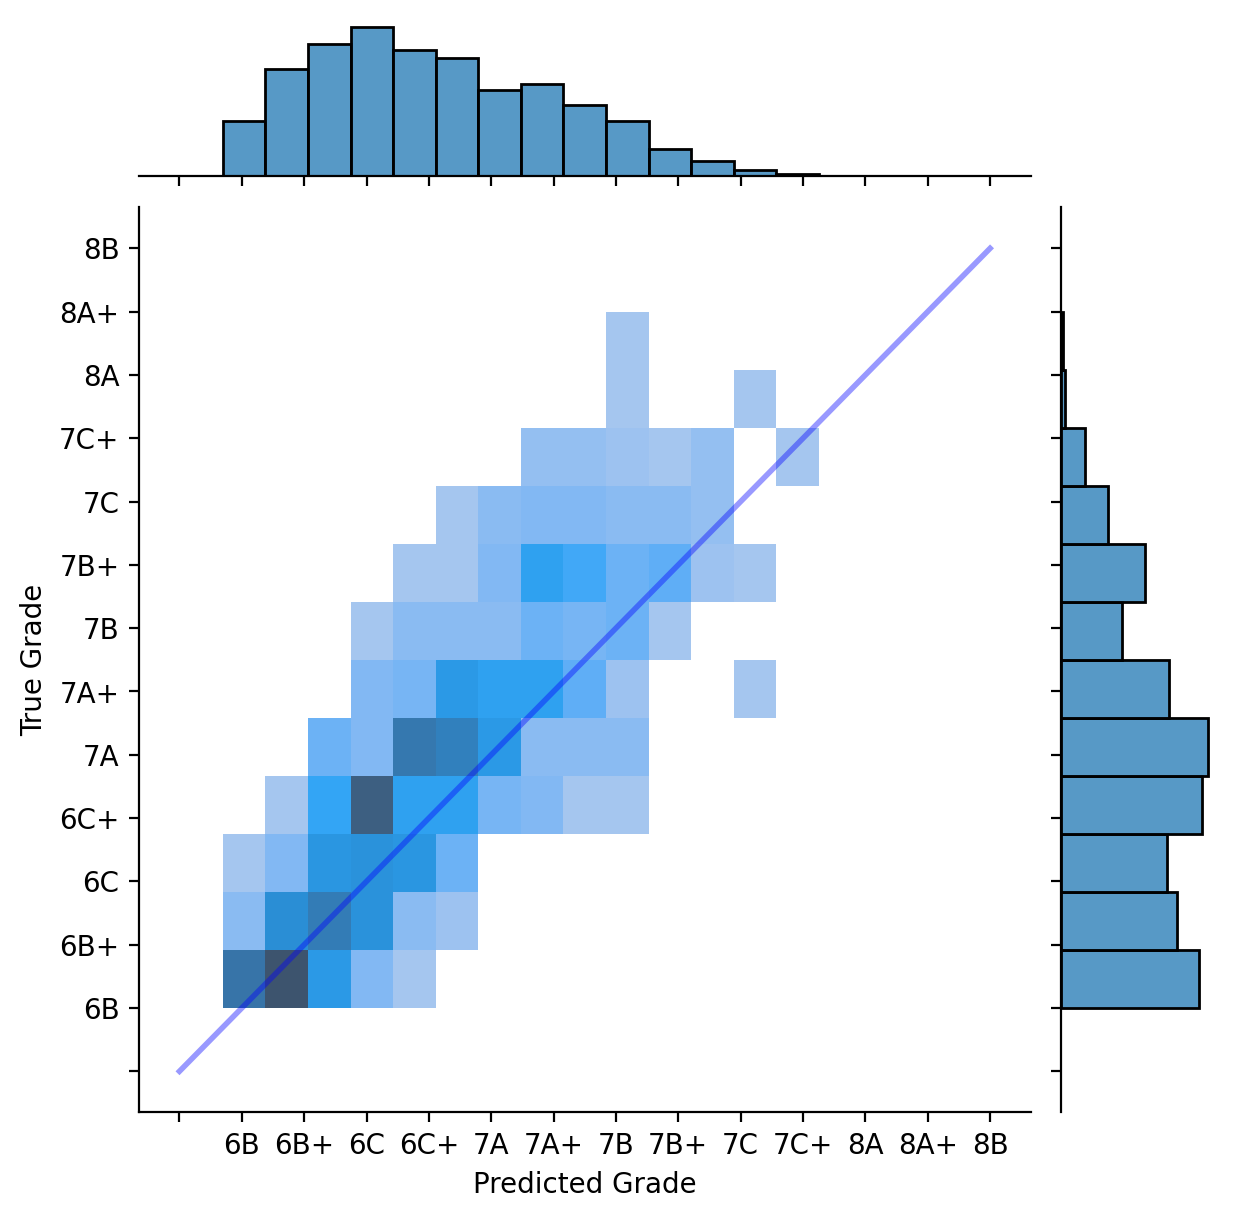

{'train_mae': 0.6931260684834788, 'train_rmse': 0.9647641746336987, 'test_mae': 1.0929784236697975, 'test_rmse': 1.4274493613512367}



In [29]:
models = [ LinearRegression(), Ridge( alpha = 1 ), SVR( kernel = 'linear' ), SVR( kernel = 'poly', degree = 5, ), SVR( kernel = 'poly', degree = 10 ),  SVR( kernel = 'rbf' ), DecisionTreeRegressor(), XGBRegressor(), ]
model_names = [ 'LR', 'LR w/ L2', 'SVR', 'SVR5', 'SVR10', 'RBF SVR', 'DTR', 'XGBR' ]

# models = [ SVR( kernel = 'rbf' ) ]
# model_names = [ 'SVR' ]
scores = []

for model, model_name in zip( models, model_names ):
    print( model_name )
    start_time = time.time()
    model.fit( X_train, y_train )
    
    timestamp = time.time() - start_time
    print( 'Time to Fit:', timestamp )
    
    train_predictions = model.predict( X_train )
    predictions = model.predict( X_test )
    
    scores.append( evaluate( train_predictions, predictions, y_train, y_test, plot_predictions = True ) )
    print( scores[-1] )
    print()

In [35]:
scores = scores.drop( columns = [ 'Model Name' ] )

In [36]:
scores = pd.DataFrame( scores )
scores['names'] = model_names

names = {
    'train_mae': 'Training MAE',
    'train_rmse': 'Training RMSE',
    'test_mae': 'Testing MAE',
    'test_rmse': 'Testing RMSE',
    'names': 'Model Name',
}

scores = scores.rename( columns = names )

display( scores )

,Training MAE,Training RMSE,Testing MAE,Testing RMSE,Model Name
0,1.041947,1.388610,1.380320,1.768345,LR
1,1.042100,1.388674,1.381471,1.769756,LR w/ L2
2,1.011157,1.439067,1.576524,2.049142,SVR
3,0.502336,0.993911,1.573913,2.158213,SVR5
4,0.723350,1.409067,2.368056,3.102201,SVR10
5,0.557979,0.931560,0.985364,1.287166,RBF SVR
6,0.000607,0.023518,1.444954,2.026997,DTR
7,0.693126,0.964764,1.092978,1.427449,XGBR


[]

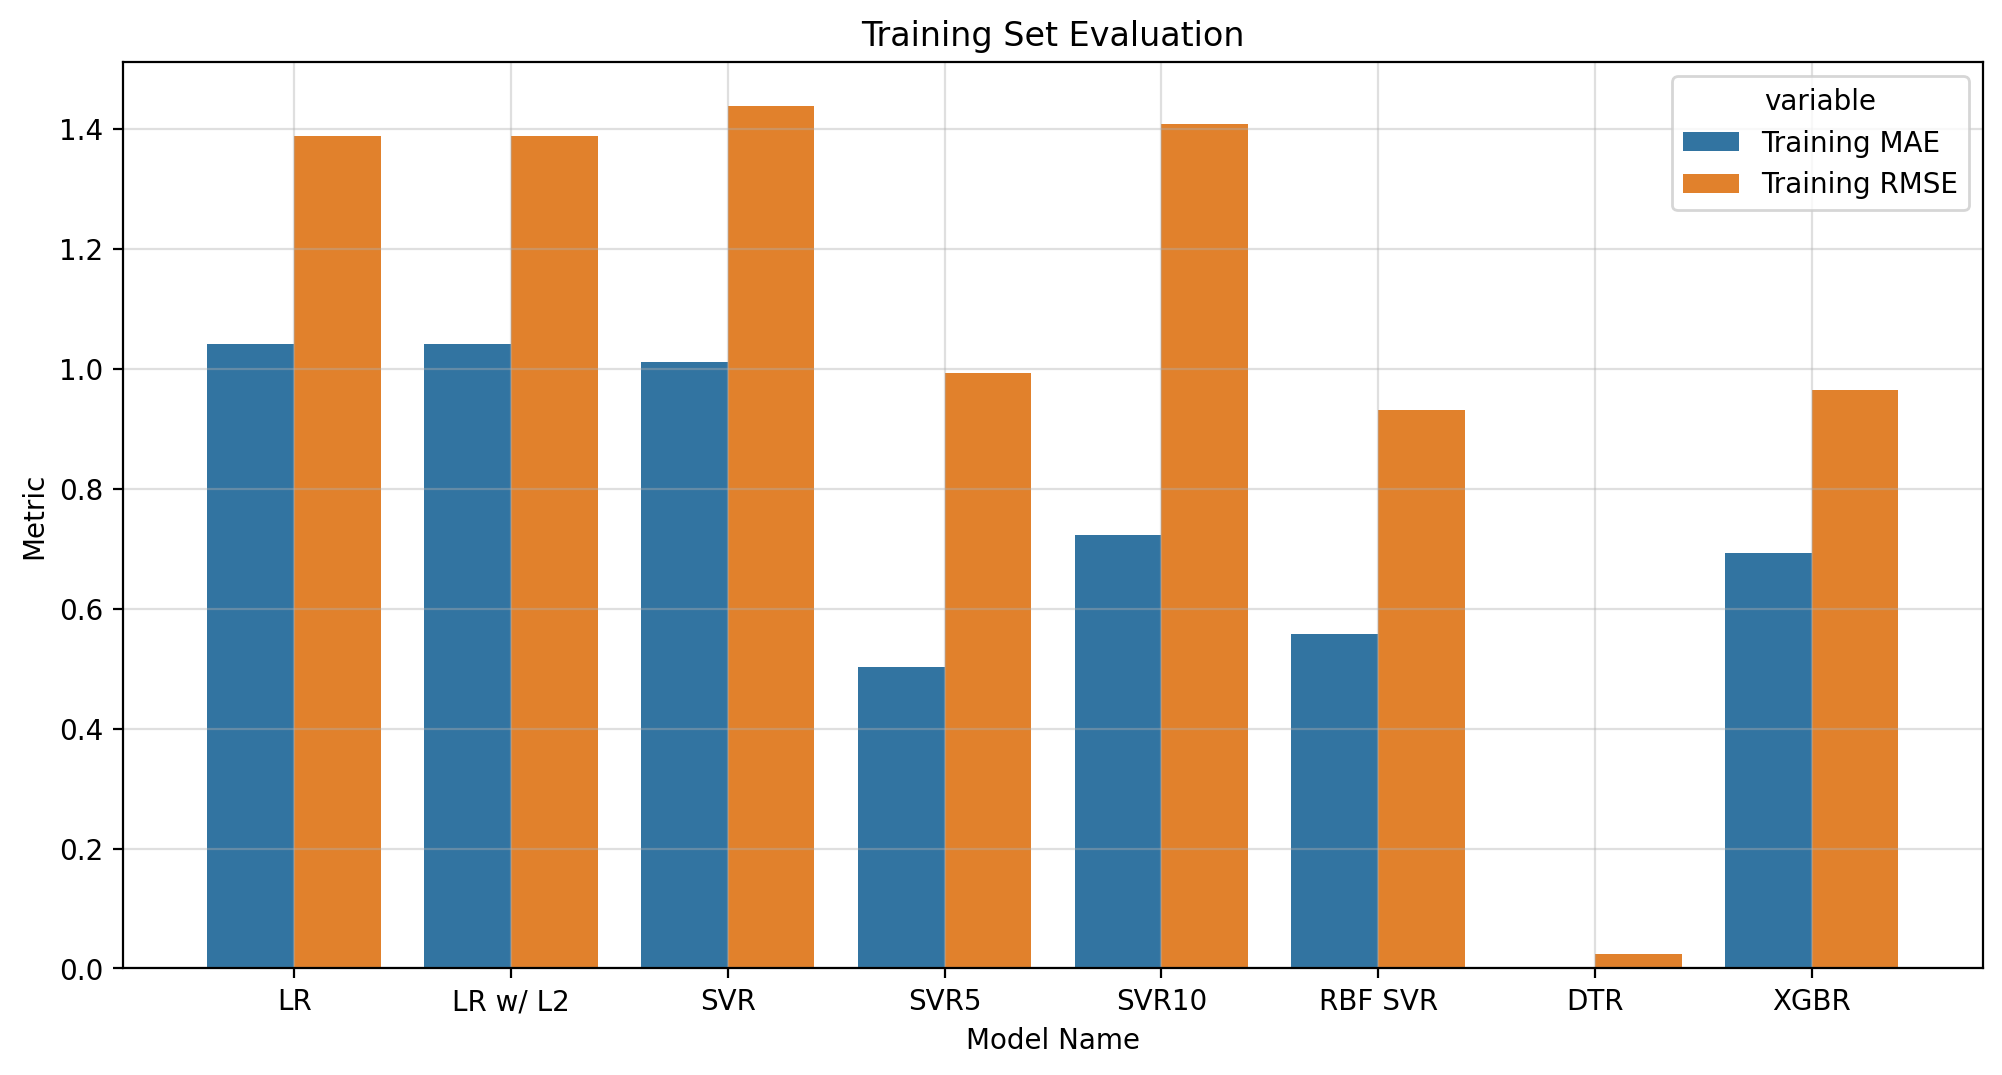

In [37]:
plot = sns.barplot(
    data = pd.melt( scores, id_vars = 'Model Name', value_vars = [ 'Training MAE', 'Training RMSE' ] ),
    y = 'value',
    x = 'Model Name',
    hue = 'variable',
    palette = 'tab10'
)
plot.set_title( 'Training Set Evaluation' )
plt.ylabel( 'Metric' )
plt.grid( alpha = 0.4 )
plt.plot()

[]

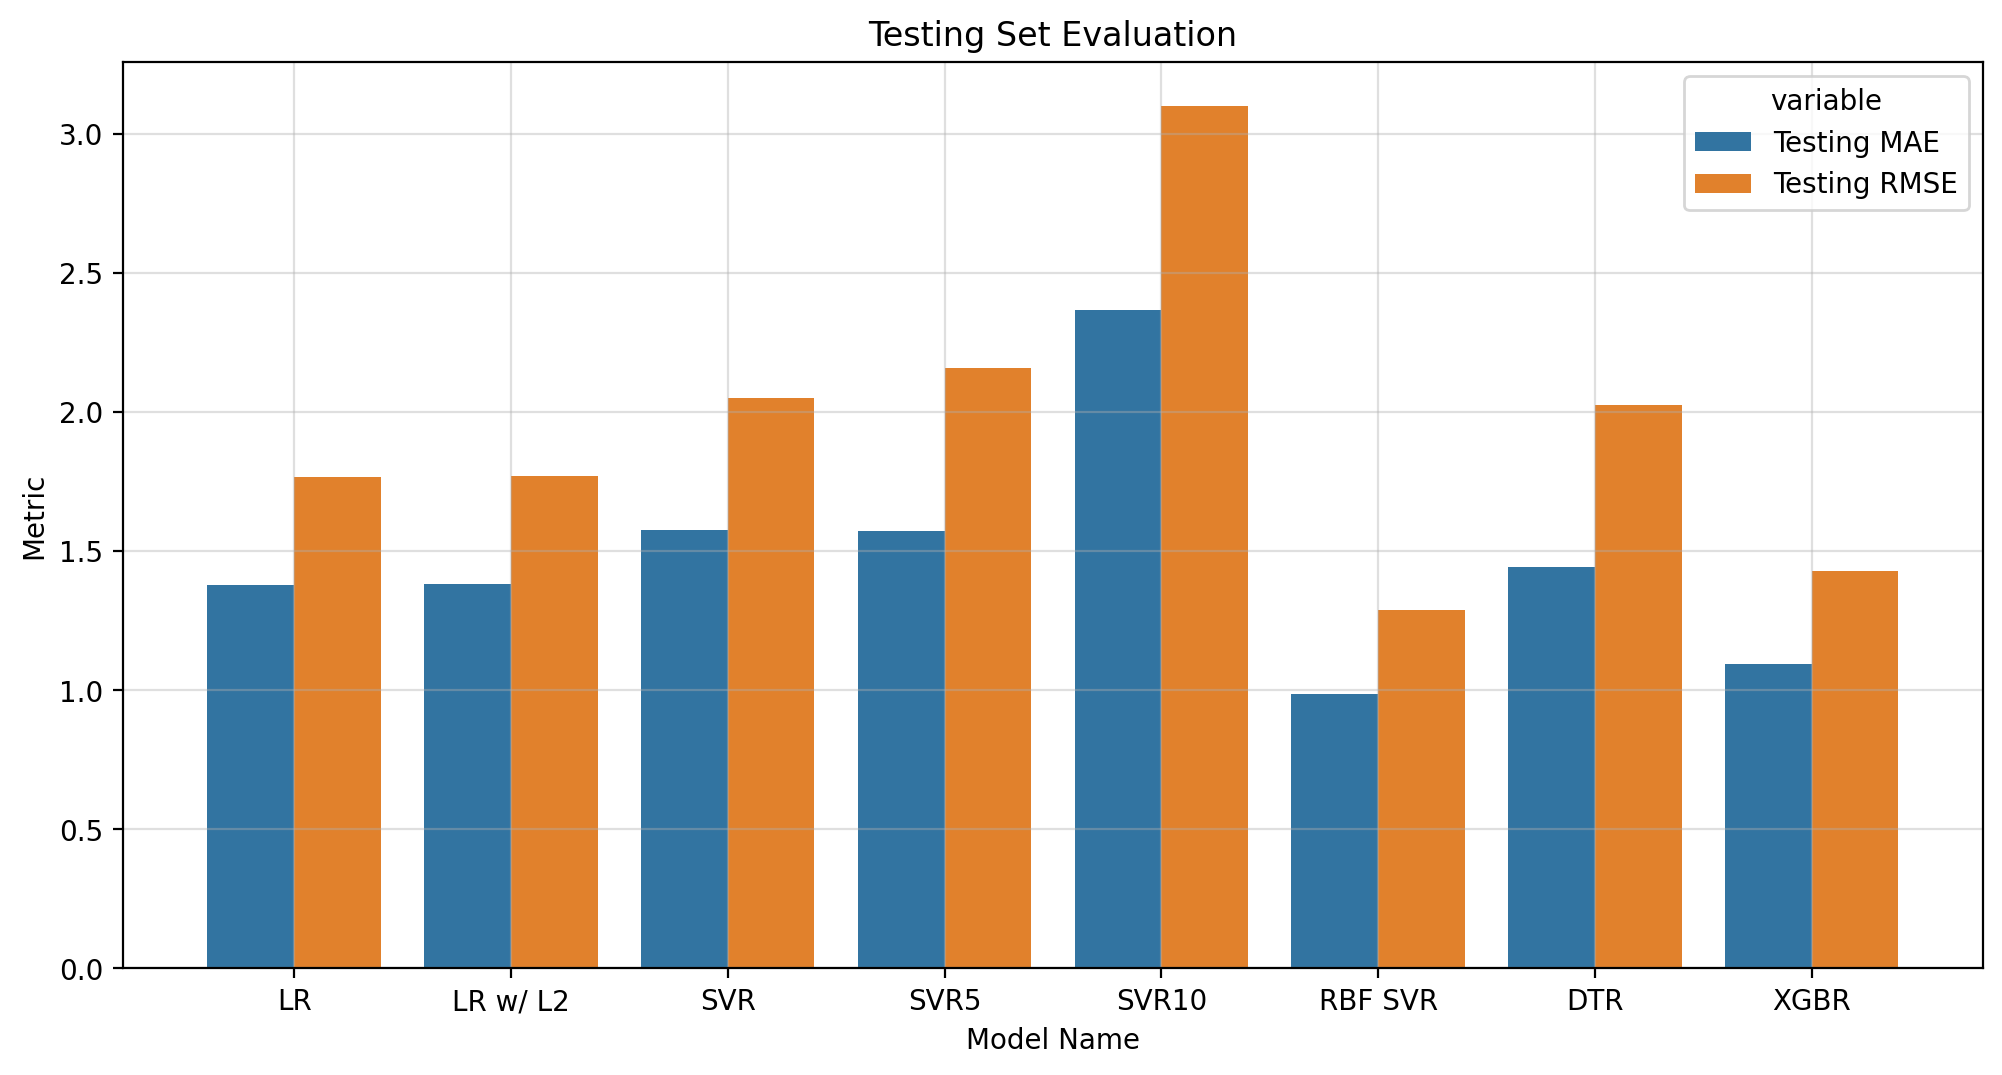

In [38]:
plot = sns.barplot(
    data = pd.melt( scores, id_vars = 'Model Name', value_vars = [ 'Testing MAE', 'Testing RMSE' ] ),
    y = 'value',
    x = 'Model Name',
    hue = 'variable',
    palette = 'tab10'
)
plot.set_title( 'Testing Set Evaluation' )
plt.ylabel( 'Metric' )
plt.grid( alpha = 0.4 )
plt.plot()

In [41]:
predictions = models[5].predict( X_test )

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [43]:
predictions = np.round( predictions )

print( classification_report( y_test, predictions, labels = range( 14 ), target_names = [ key for key in grades.keys() ][1:] ) )

              precision    recall  f1-score   support

          6B       0.00      0.00      0.00         0
         6B+       0.84      0.60      0.70        77
          6C       0.38      0.51      0.44        65
         6C+       0.21      0.34      0.26        59
          7A       0.29      0.32      0.30        79
         7A+       0.33      0.30      0.32        82
          7B       0.32      0.33      0.33        60
         7B+       0.17      0.24      0.20        34
          7C       0.31      0.17      0.22        47
         7C+       0.20      0.08      0.11        26
          8A       0.00      0.00      0.00        13
         8A+       0.00      0.00      0.00         2
          8B       0.00      0.00      0.00         1
         8B+       0.00      0.00      0.00         0

   micro avg       0.34      0.34      0.34       545
   macro avg       0.22      0.21      0.20       545
weighted avg       0.36      0.34      0.34       545



/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/ho

/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prediction Error vs Number of Holds')

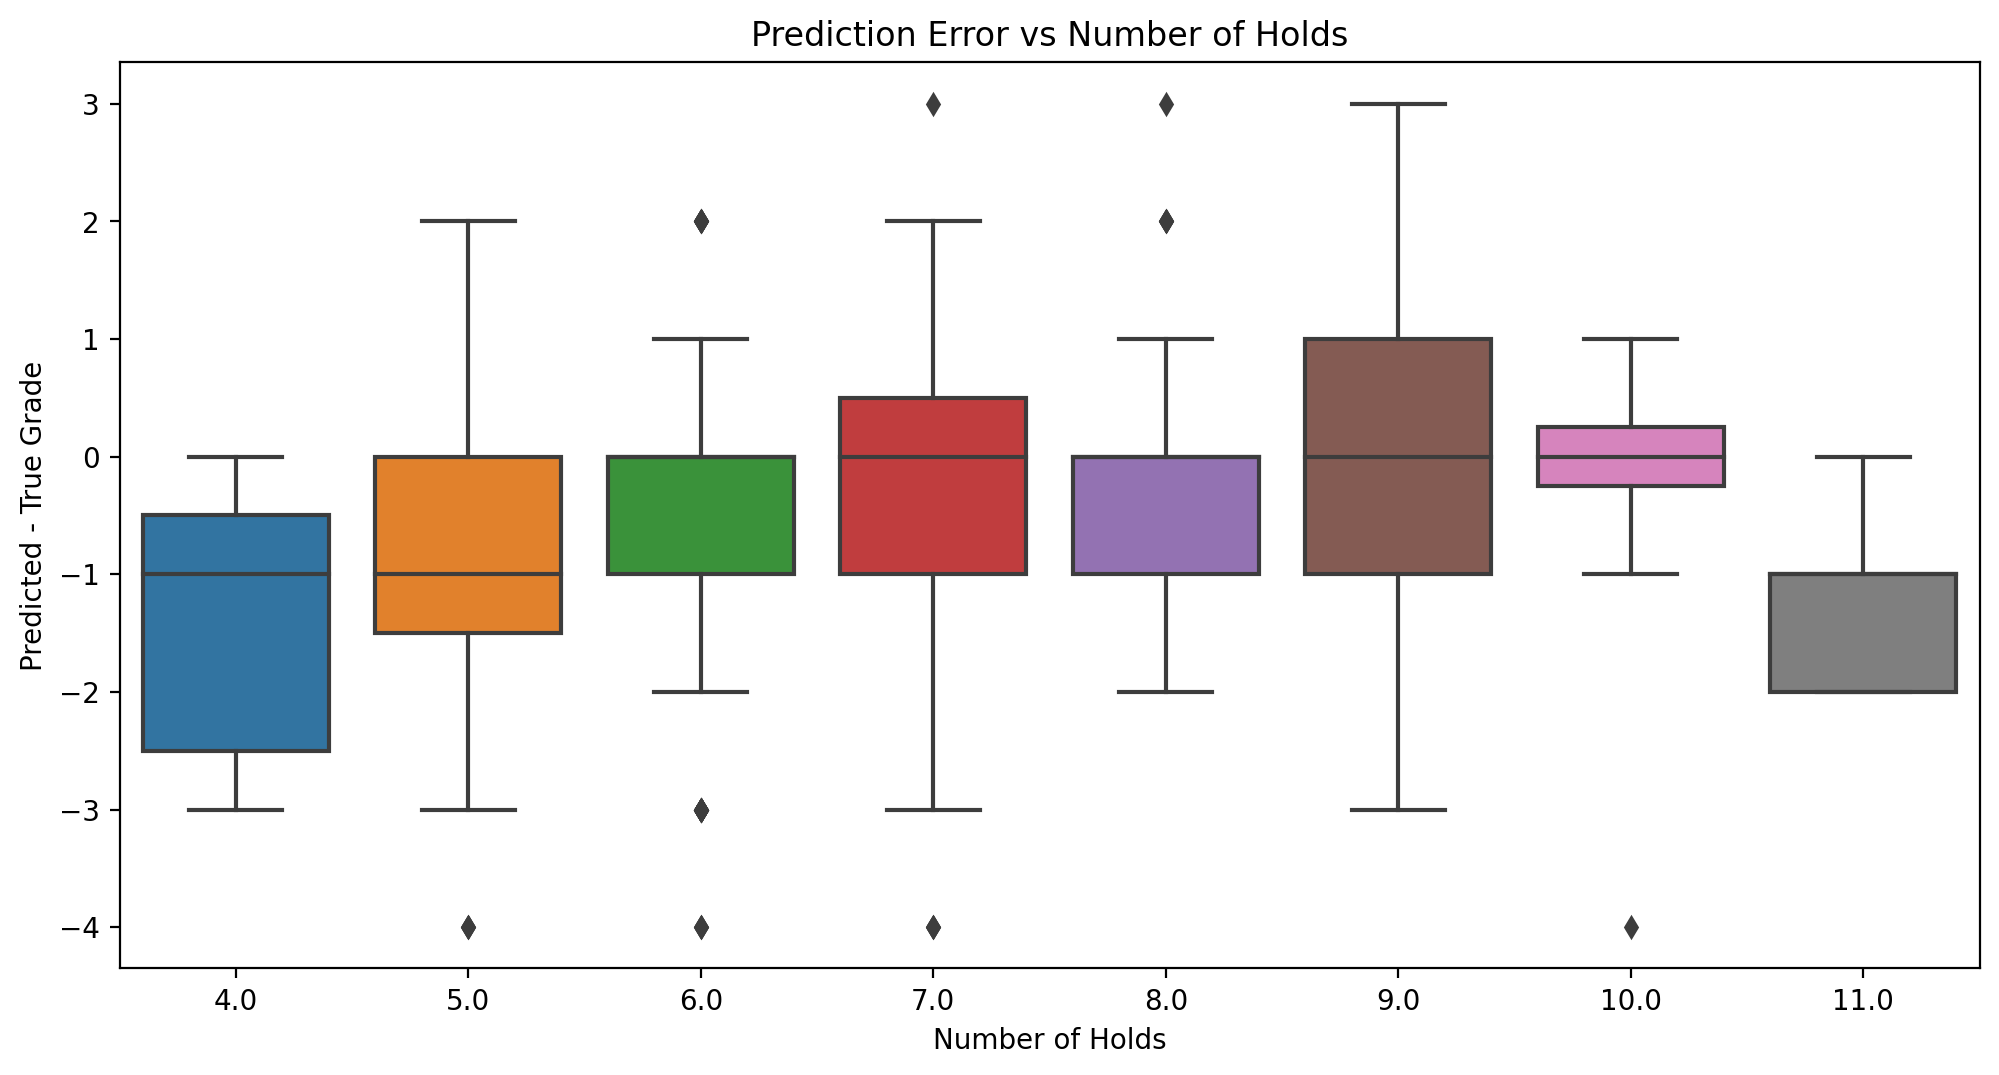

In [47]:
plot = sns.boxplot(
    np.sum( X_test, axis = 1 ),
    predictions - y_test,
)
plt.xlabel( 'Number of Holds' )
plt.ylabel( 'Predicted - True Grade' )
plt.title( 'Prediction Error vs Number of Holds' )

/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Grade Error')

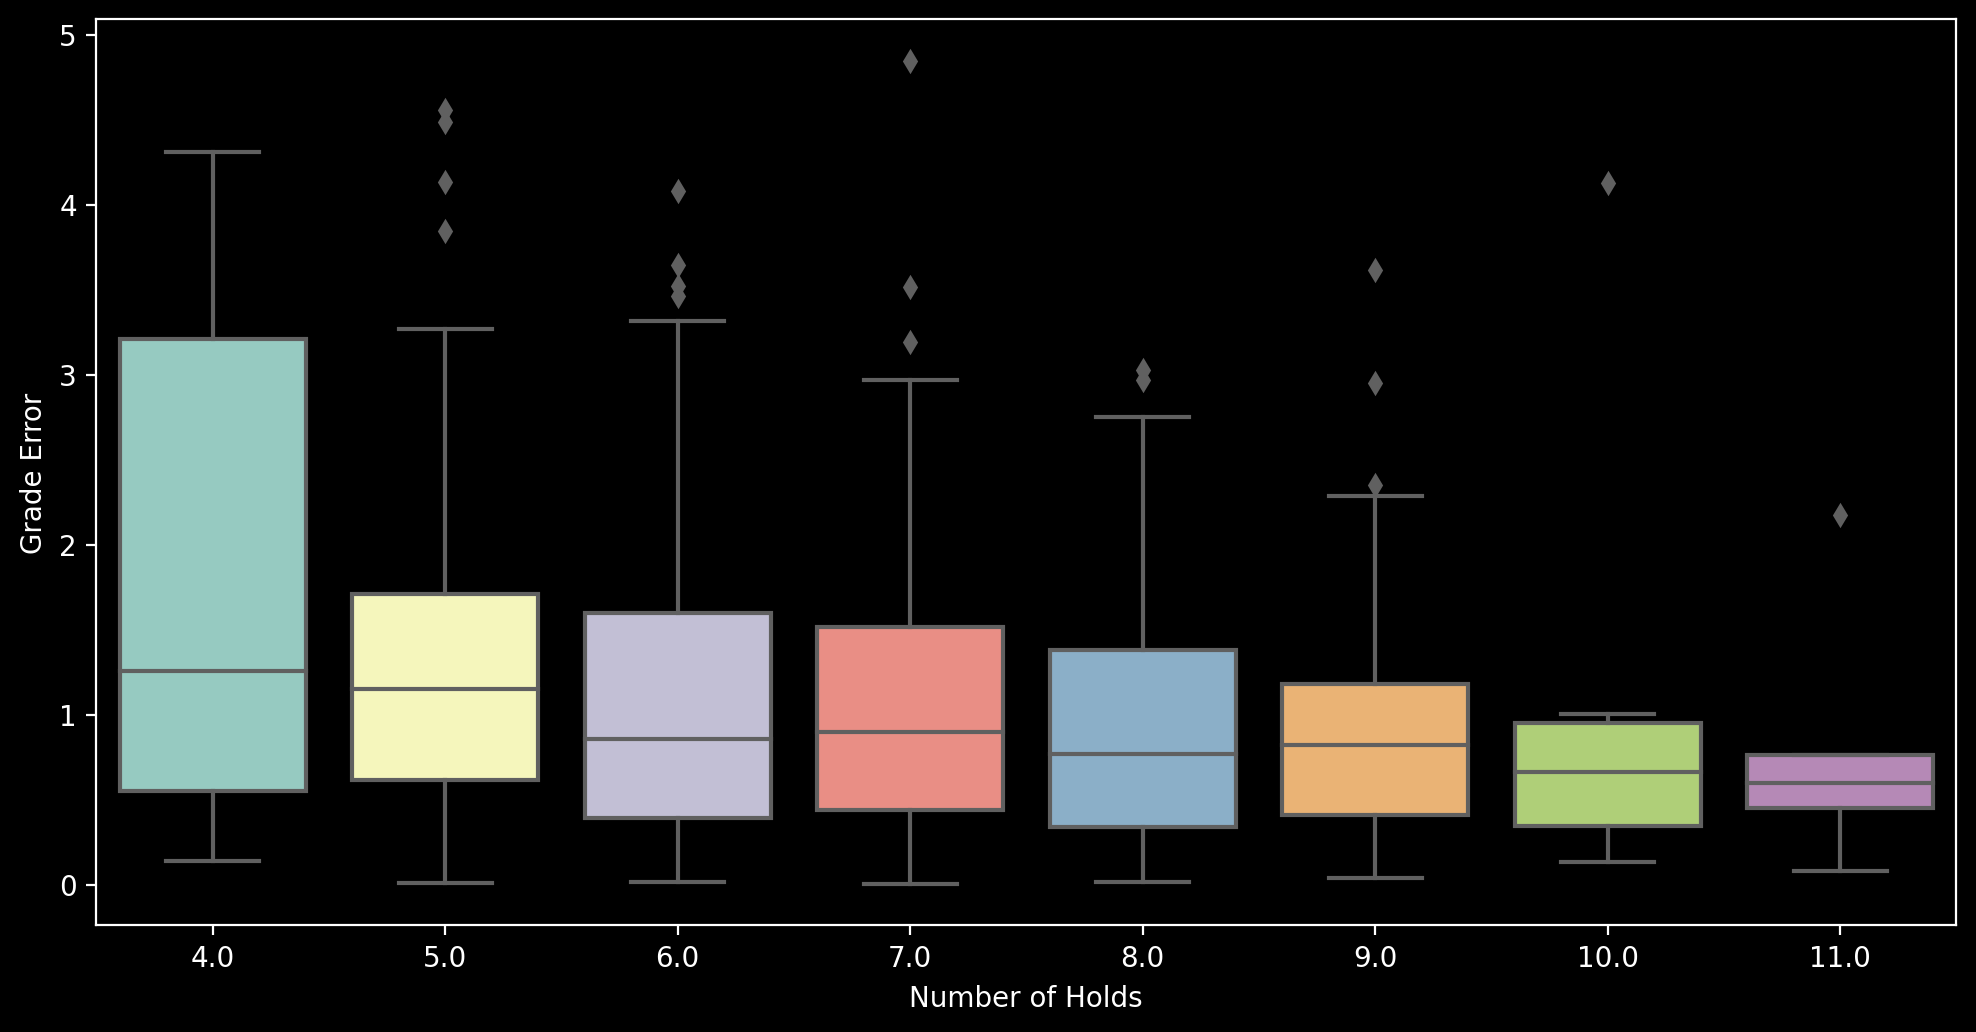

In [113]:
plot = sns.boxplot(
    np.sum( X_test, axis = 1 ),
    np.abs( y_test - lr.predict( transform.transform( X_test ) ) ),
)
plt.xlabel( 'Number of Holds' )
plt.ylabel( 'Grade Error' )

ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of ticklabels (15).

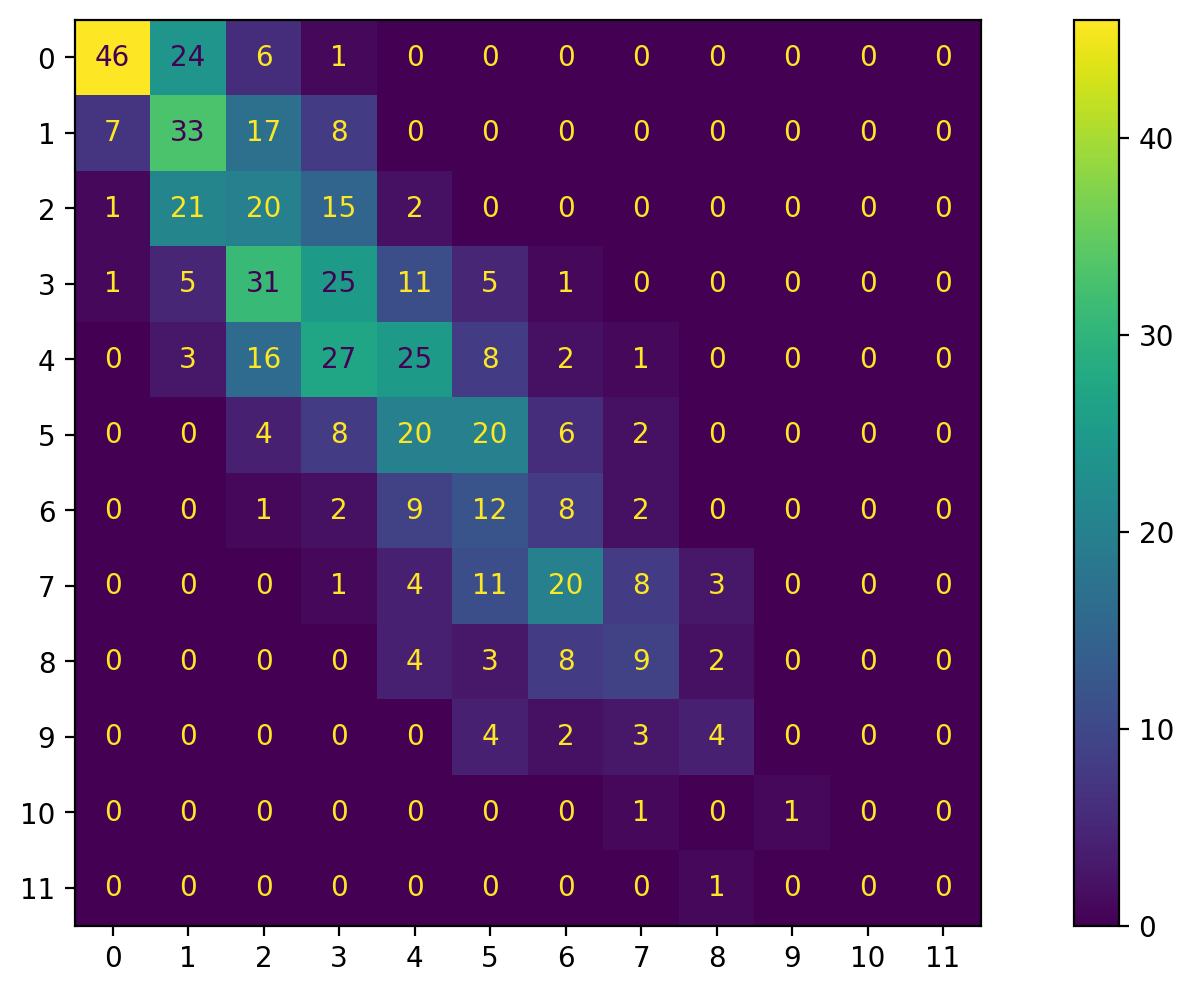

In [48]:
cm = confusion_matrix( y_test, predictions )
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = grades )
disp.plot()
plt.show()

In [77]:
X_train = transform.fit_transform( X_train )

In [81]:
lr = Ridge( alpha = 1, fit_intercept = True )

lr.fit( X_train, y_train )

Ridge(alpha=1)

In [92]:
from matplotlib import colors

d = ( np.dot(lr.coef_, transform.components_) + transform.mean_ )

divnorm=colors.TwoSlopeNorm( vmin = -max( abs( np.min( d ) ), np.max( d ) ), vcenter=0., vmax= max( abs( np.min( d ) ), np.max( d ) ) )

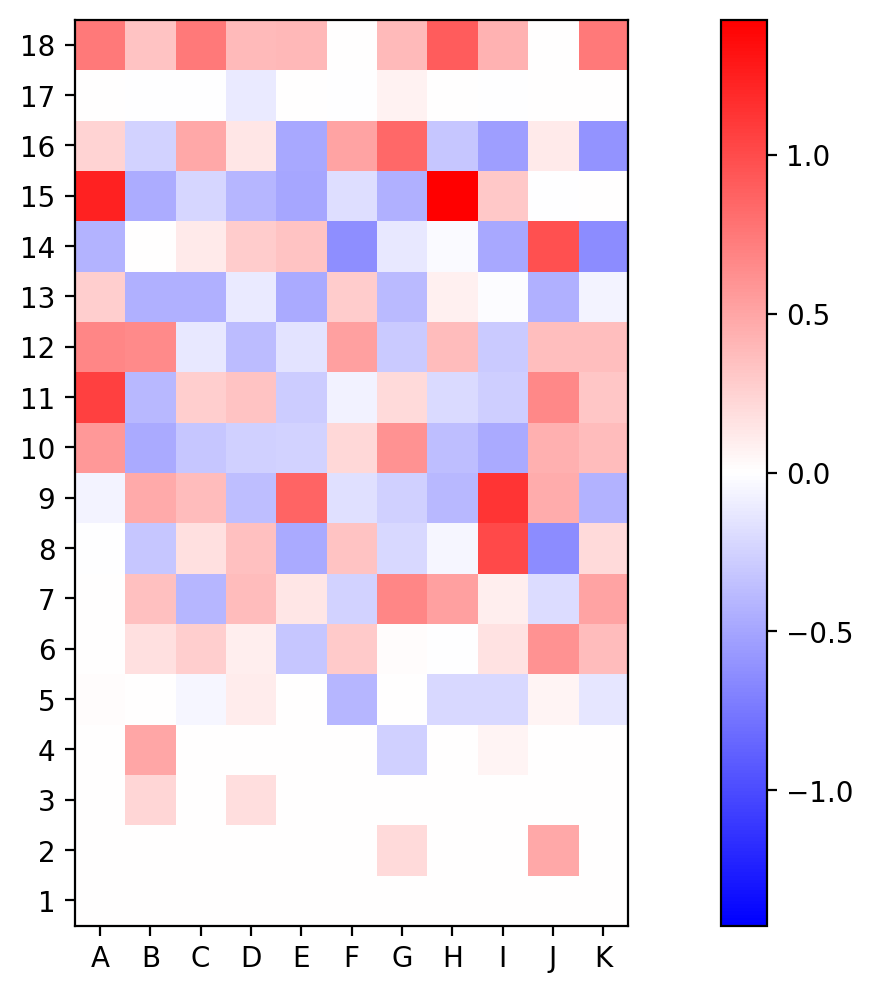

In [93]:
plt.imshow( d.reshape( 18, 11 ), cmap = 'bwr', norm = divnorm )
plt.colorbar()
plt.yticks( range( 18 ), range( 18, 0, -1 )  )
plt.xticks( range( 11 ), [ c.upper() for c in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', ] ] )
plt.show()

In [ ]:
from matplotlib.colors import LogNorm

sns.heatmap( 
    np.cov( X.T ),
    norm = LogNorm(),
)

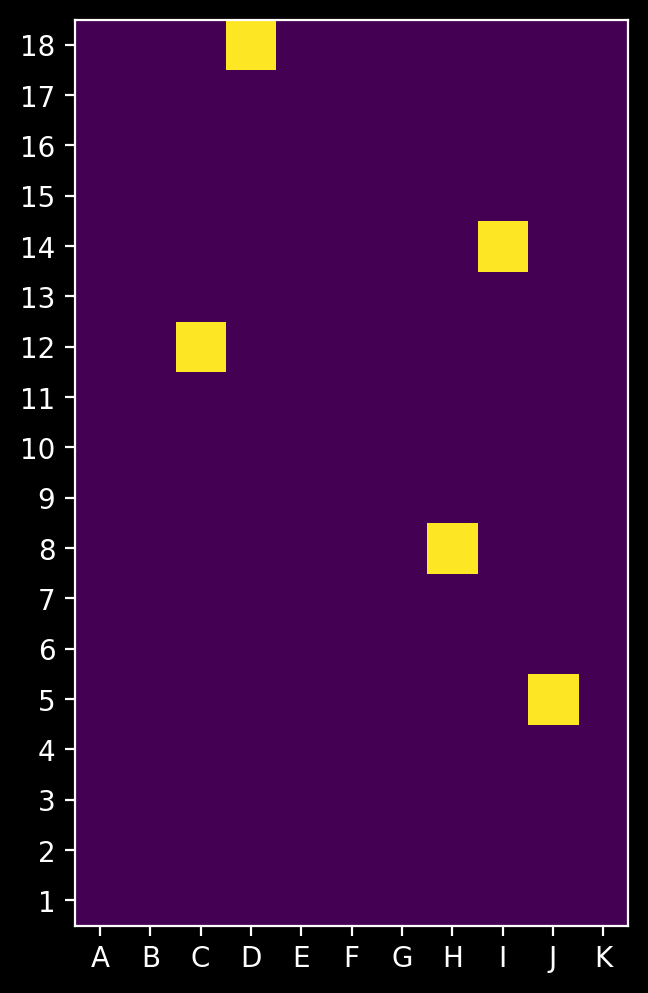

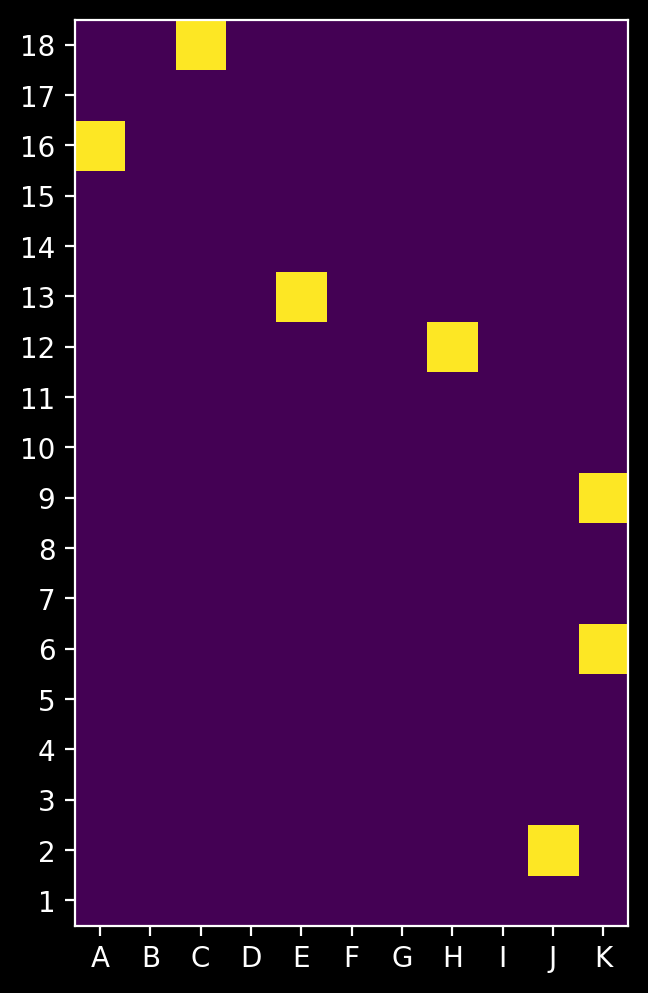

In [117]:
for climb in X_test[np.abs( y_test - predictions ) > 4]:
    plt.imshow( climb.reshape( 18, 11 ) )
    plt.yticks( range( 18 ), range( 18, 0, -1 )  )
    plt.xticks( range( 11 ), [ c.upper() for c in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', ] ] )
    plt.show()

In [100]:
# Add some engineered features:
# Number of holds
# Average distance between holds